# **Punto 1 del taller**

# Importar librerias necesarias y montar la data

In [1]:
#Importamos la librerias necesarias para el tratamiento de toda la data
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from matplotlib import cm

import warnings
#suppress warnings
warnings.filterwarnings('ignore')

In [2]:
# from google.colab import drive

# drive.mount('/content/drive')

# %cd "/content/drive/MyDrive/Colab Notebooks/IA/RegresionLineal_2_variables/"

# Cargar data

In [3]:
#Cargamos la data
data = np.loadtxt("datos2.txt",delimiter=',',skiprows=0,usecols=[0,1,2],dtype='float')
dataSize = data.shape
print('Tamaño de data:',dataSize)

Tamaño de data: (47, 3)


# Normalizar la data cargada (X1, X2 y Y)

In [4]:
#Calculamos el promedio por columna. axis = 0 permite que sea columna por columna
promX = np.mean(data, axis = 0)

#Calculamos la desviación estandar por columna. axis = 0 permite que sea columna por columna
stdX = np.std(data, axis = 0)

print('promX:', promX)
print('stdX:', stdX)

#Inicializamos la matriz que almacenará los datos normalizados
dataNormalizada = np.zeros((dataSize[0], dataSize[1]))

#Normalizamos aplicando al respectiva fórmula
for i in range(dataSize[0]):
    for j in range(3):
        dataNormalizada[i, j] = (data[i, j] - promX[j]) / stdX[j]

promX: [  3000.68085106   1003.17021277 341412.76595745]
stdX: [7.86202619e+02 7.52842809e-01 1.23702548e+05]


# Graficar la data normalizada

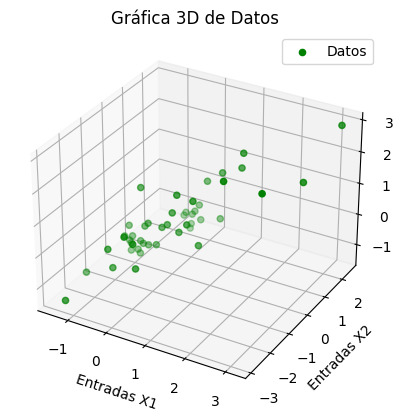

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar los datos en 3D usando la data normalizada
ax.scatter(dataNormalizada[:,0], dataNormalizada[:,1], dataNormalizada[:,2], c='g', marker='o', label='Datos')

# Personalizar el gráfico
ax.set_xlabel('Entradas X1')
ax.set_ylabel('Entradas X2')
ax.set_zlabel('Salida Y')
ax.set_title('Gráfica 3D de Datos')

# Agregar una leyenda
ax.legend()

# Mostrar el gráfico
plt.show()

# Inicializar los Beta, crear X y Y

In [6]:
Beta = np.zeros((3,1)) # Beta es un vector de 3 filas 1 columna, almacenará a B0, B1 y B2
onesVector = np.ones((dataSize[0],)) # Crea un vector de unos del tamaño de datazise[0]

# Crea la matriz X concatenando onesvector con dataNormalizada[:,0] y dataNormalizada==> [:,] significa todas las filas de la columna 0
X = np.column_stack((onesVector,dataNormalizada[:,0],dataNormalizada[:,1]))

# Crea un vector de 0's de m filas y 1 columna
y=np.zeros((dataSize[0],1))

# Se asignan las salidas al vector y
y[:,0] = dataNormalizada[:,2]

# Función Gradiente Descendente

In [7]:
def Gradiente(Beta,alpha,m,X,y,numIter,J):
  betaTemp = np.zeros((3,1)) # Inicializamos un vector auxiliar para almacenar los Betas.
  h_beta = np.zeros((m,1)) # Inicializamos un vector auxiliar para almacenar la hipotesis.
  betaPrint = np.zeros((numIter,3)) # Inicializamos un vector auxiliar para almacenar todos los Betas cálculados en cada iteración..

  for i in range(numIter):
    h_beta = np.dot(X,Beta) #alculamos la hipótesis

    temp_diff = np.subtract(h_beta, y) #Creo temp_diff solo para guardar la resta entre hipotesis y Y
    for j in range(3): # Con J=0 se calcula B0, con J=1 se calcula B1 y con J=2 se calcula B2
      temp1 = (np.reshape(X[:,j],(m,1)))


      # En temp2 reemplazo la parte correspondiente a la resta por la variable temp_diff
      # hago el multiply y la sumatoria
      temp2 = np.sum(np. multiply(temp1,temp_diff))

      betaTemp[j,0] = Beta[j,0] - (temp2*(alpha/m)) # Calculamos los Betas
      betaPrint[i,j] = betaTemp[j,0] # Almacenamos cada Beta calculado

    Beta = betaTemp # Actualizamos los Betas
    h_beta = np.dot(X,Beta)
    # Para la función Cost hacemos la sumatoria de los cuadrados de temp_diff
    J[i]  = np.sum(np.square(temp_diff)) / (2 * m)

  return (Beta, J, betaPrint, h_beta)


# Ejecución de la función Gradiente con su respectiva gráfica de Cost y los Beta

Beta0:  [-2.46788405e-16]
Beta1:  [0.832902]
Beta2:  [-0.001635]


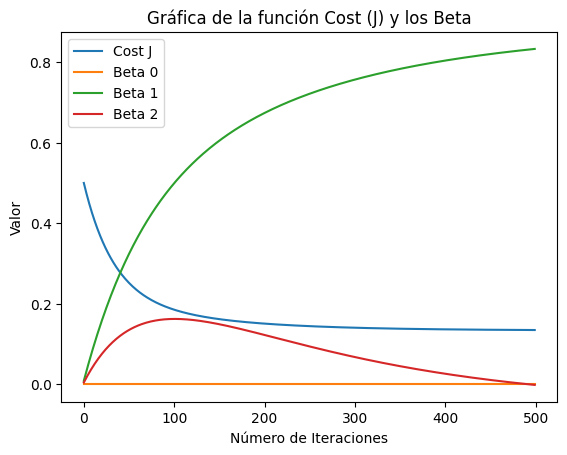

In [8]:
alpha = 0.01
numIter = 500 # Cantidad de iteraciones
m = dataSize[0] # Cantidad de datos de entrenamiento
J = np.zeros((numIter,1))
Beta = np.zeros((3,1))

Beta, J, betaPrint, h_beta = Gradiente(Beta,alpha,m,X,y,numIter,J)
print('Beta0: ', Beta[0])
print('Beta1: ', Beta[1])
print('Beta2: ', Beta[2])

plt.plot(J,'-', label='Cost J')
plt.plot(betaPrint[:, 0],'-', label='Beta 0')
plt.plot(betaPrint[:, 1],'-', label='Beta 1')
plt.plot(betaPrint[:, 2],'-', label='Beta 2')

# Agrega etiquetas a los ejes
plt.xlabel('Número de Iteraciones')
plt.ylabel('Valor')
plt.title('Gráfica de la función Cost (J) y los Beta')

# Agrega una leyenda
plt.legend()

# Muestra el gráfico
plt.show()


# Gráfica en 3D

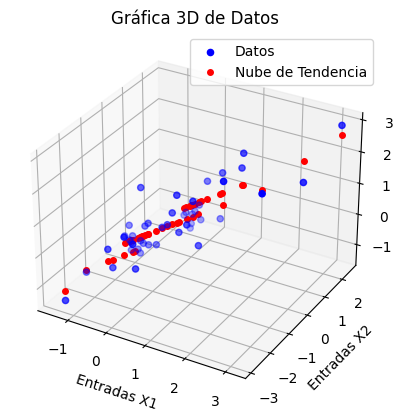

In [12]:

# Coeficientes encontrados por el cálculo del gradiente descendente
B0 = Beta[0]
B1 = Beta[1]
B2 = Beta[2]

# Crear una figura y un objeto de subtrama 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar los datos en 3D
ax.scatter(dataNormalizada[:,0], dataNormalizada[:,1], dataNormalizada[:,2], c='b', marker='o', label='Datos')

# Graficar la línea recta
ax.plot(dataNormalizada[:,0], dataNormalizada[:,1], h_beta[:, 0], 'o', markersize=4,c='r', label='Nube de Tendencia')

# Personalizar el gráfico
ax.set_xlabel('Entradas X1')
ax.set_ylabel('Entradas X2')
ax.set_zlabel('Salida Y')
ax.set_title('Gráfica 3D de Datos')

# Agregar una leyenda
ax.legend()

# Mostrar el gráfico
plt.show()